# Style setup

In [11]:
import seaborn as sns
sns.set_theme(context='paper',
             style = 'whitegrid')

# Locations setup

In [20]:
imagefolder = '../images/'

# Hall images

In [12]:
import import_ipynb
import hall_data

In [13]:
hall = hall_data.get_df()
hall.columns

Index(['doping', 'capping', 'anneal', 'filename', 'mu_H', 'Carrier type', 'n',
       'n_sh', 'R_H', 'R_H_sh', 'rho', 'rho_sh', 'V_H', 'd'],
      dtype='object')

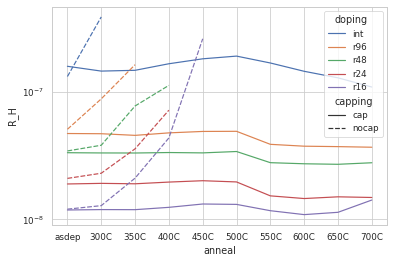

In [21]:
p = sns.lineplot(x = 'anneal',
                y = 'R_H',
                style = 'capping',
                hue   = 'doping',
                data = hall,
                )
    
p.set(yscale = 'log')

p.get_figure().savefig(imagefolder + 'R_H_vs_anneal.png')